In [24]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [25]:
import os

def read_data(base_path, experiment_name):
    if "QDQN" in experiment_name:
        path = os.path.join(base_path, experiment_name, 'actor_0', 'progress.json')
    else:
        path = os.path.join(base_path, experiment_name, 'progress.json')
    return pd.read_json(path, lines=True)
    
def analyze_experiments(base_path, experiments, x_label, y_label):
    data = {}
    for experiment in experiments:
#         print(experiment)
        data[experiment] = read_data(base_path, experiment)

    ax = None
    for name, df in data.items():
        ax = df.plot(x=x_label, y=y_label, ax=ax, label=name, figsize=(20, 15))
    
    leg = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    for line in leg.get_lines():
        line.set_linewidth(4)

In [26]:
base_path = 'results/ppaquette.DoomDefendCenter-v0/'
all_doom_exp = os.listdir(base_path)

def get_params(name):
    items = [v.split('=') for v in name.split(',')[1:]]
    return {k: v for k, v in items}

def filter_exp(name):
#     if not "DQN_NO_TRAIN" in name and not "DQN_PY_FUNC" in name and not "DQN_PASS" in name  and not "DQN_PLACEHOLDERS" in name :
#         return False
    
#     if not "PongNoFrame" in name:
#         return False
    
    params = get_params(name)
#     if params['exploration_length'] >= 100000:
#         return False
    
#     if params["learning_rate"] > 0.005:
#         return False
    
#     if params['batch_size'] not in [32, 64, 128]:
#         return False
    
    return True

doom_exp = [exp for exp in all_doom_exp if filter_exp(exp)]

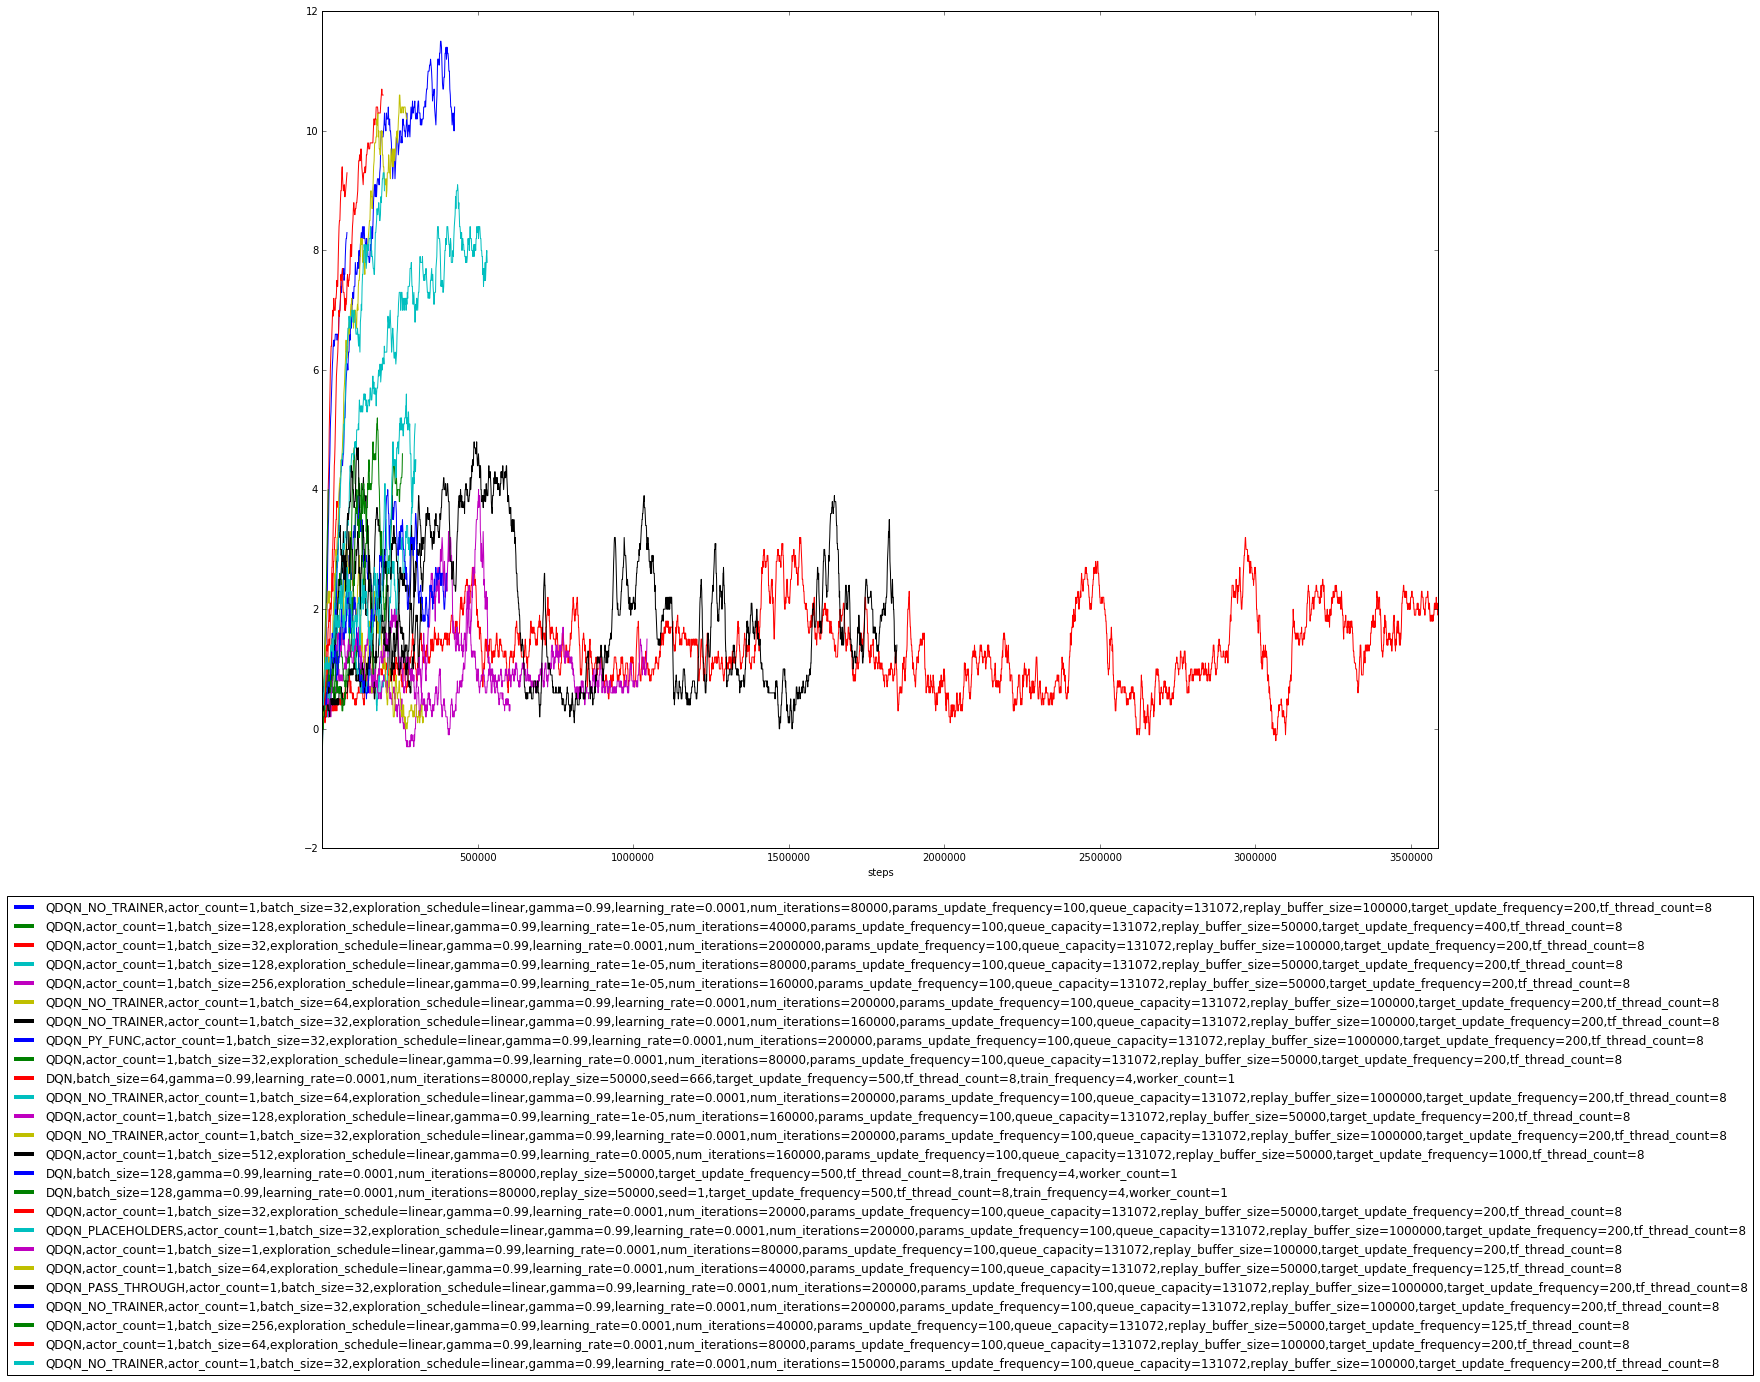

In [27]:
analyze_experiments(base_path, doom_exp, 'steps', 'mean episode reward')

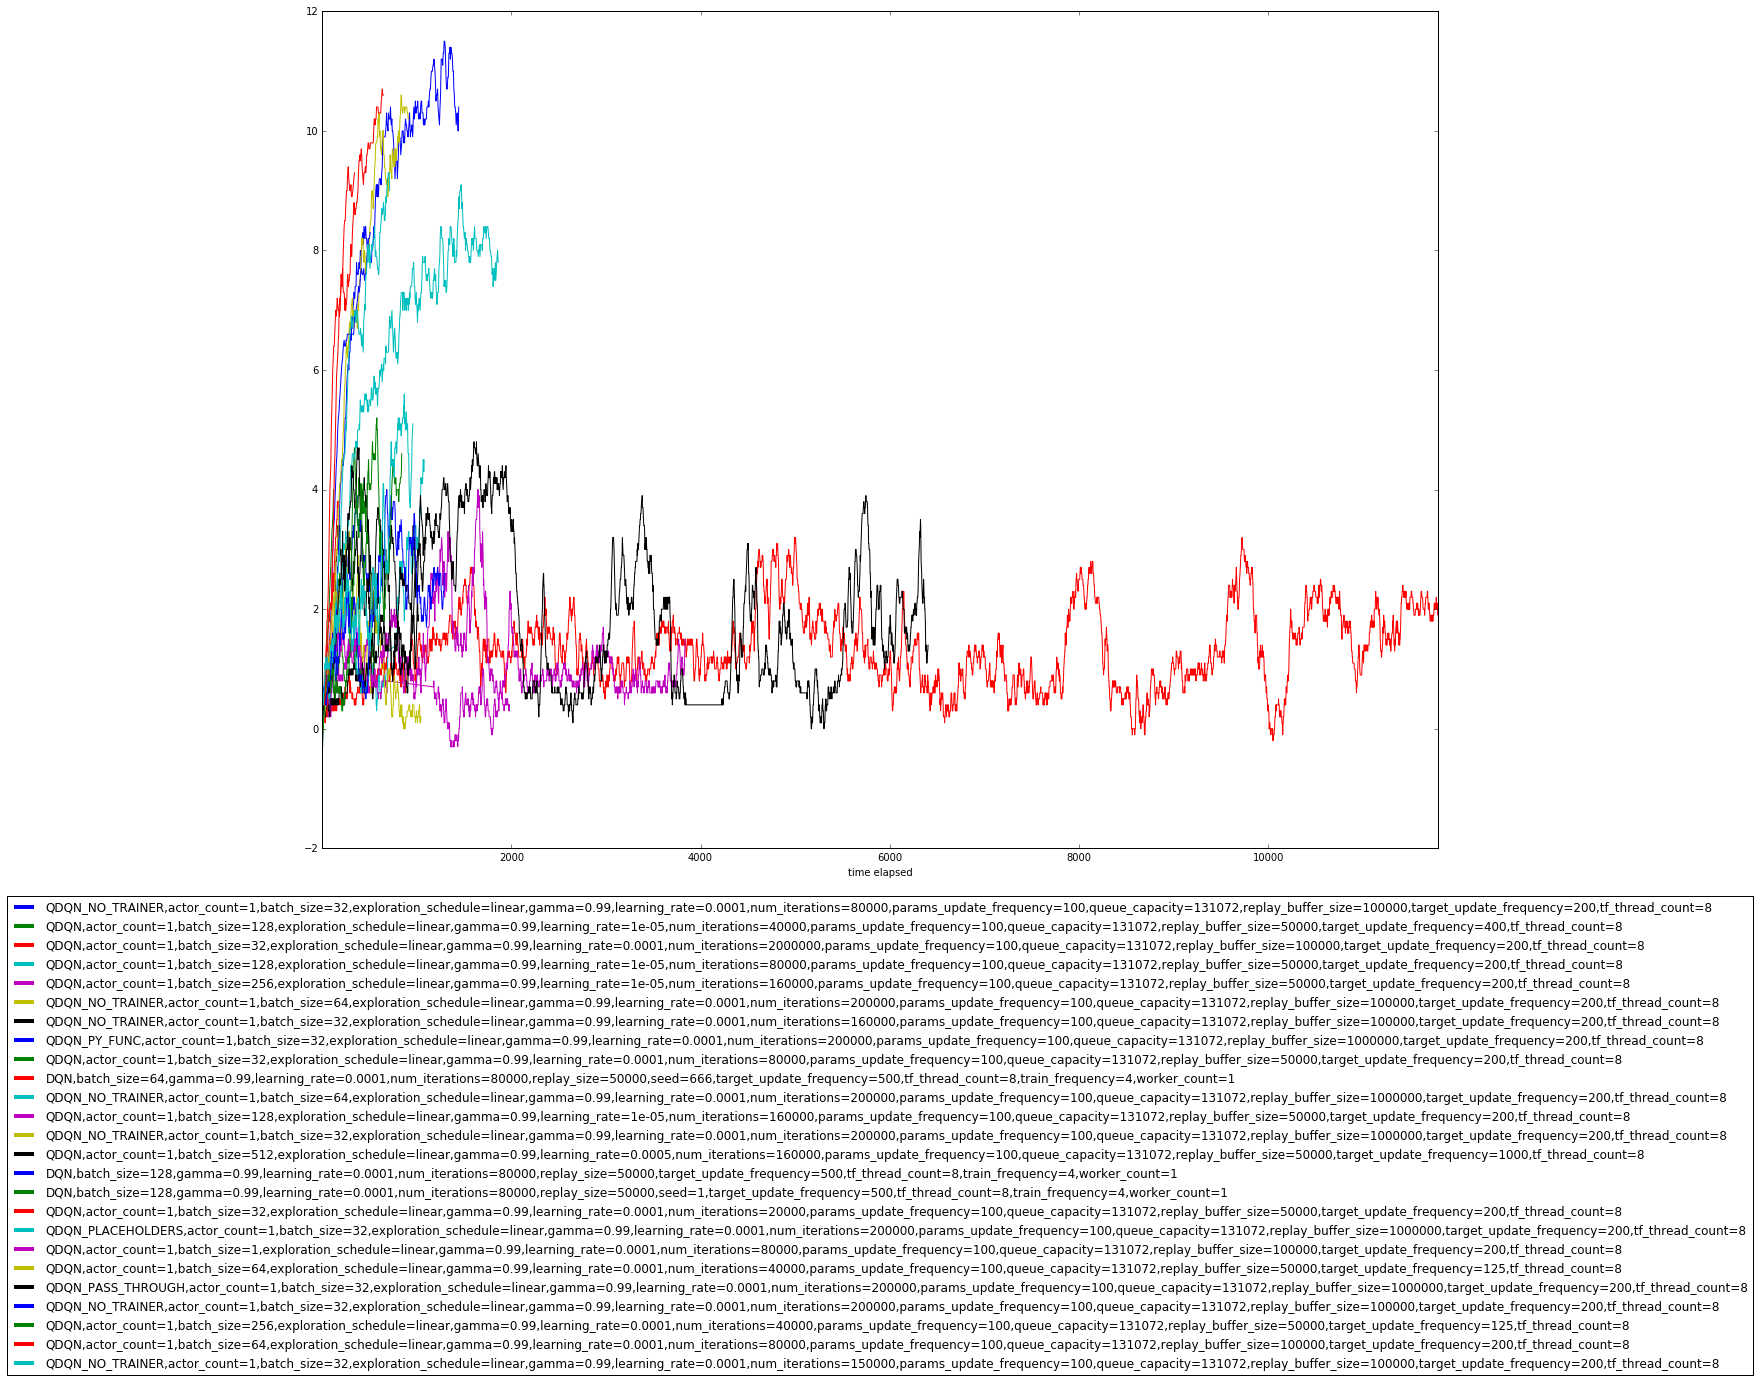

In [28]:
analyze_experiments(base_path, doom_exp, 'time elapsed', 'mean episode reward')

###### analyze_experiments(base_path, doom_exp, 'step', 'batch_max_td_error')

In [15]:
doom_exp

['QDQN,actor_count=1,batch_size=64,exploration_schedule=linear,gamma=0.99,learning_rate=0.0001,num_iterations=20000,params_update_frequency=1000,queue_capacity=131072,replay_buffer_size=50000,target_update_frequency=200,tf_thread_count=8']

In [6]:
df = pd.read_json(os.path.join(base_path, 'QDQN,actor_count=1,batch_size=512,exploration_schedule=linear,gamma=0.99,learning_rate=0.0005,num_iterations=160000,params_update_frequency=100,queue_capacity=131072,replay_buffer_size=50000,target_update_frequency=1000,tf_thread_count=8/learner', 'progress.json'), lines=True)

In [8]:
df

,batch_max_td_error,batch_min_td_error,frames/s,mean gradient,mean td_error,queue_size,step,steps/s,time elapsed,train_share,train_time,update_target_share,update_target_time
0,0.955498,-0.998587,7168.508570,0.04907,0.00055,25,300,14.000993,21.427081,NaN,NaN,NaN,NaN
1,0.927174,-0.989739,9396.766341,0.04150,0.00180,27,600,18.353059,32.692109,99.982585,0.036720,NaN,NaN
2,0.924211,-0.991484,10480.741907,0.04462,0.00084,27,900,20.470199,43.966361,99.986638,0.037286,NaN,NaN
3,1.576449,-0.930078,11115.319066,0.05691,-0.00051,25,1200,21.709608,55.275079,99.985994,0.037713,NaN,NaN
4,1.136201,-0.866324,11534.784407,0.05192,-0.00009,25,1500,22.528876,66.581235,99.984426,0.037770,NaN,NaN
5,0.968232,-0.968001,11833.139219,0.04578,-0.00009,25,1800,23.111600,77.882981,99.983713,0.037753,NaN,NaN
6,1.106899,-0.932051,12053.703139,0.06099,-0.00075,25,2100,23.542389,89.200812,99.984397,0.037803,NaN,NaN
7,0.995822,-0.971303,12222.366537,0.05956,-0.00022,19,2400,23.871810,100.537009,99.982754,0.037816,NaN,NaN
8,0.913186,-0.981117,12355.197743,0.05770,-0.00067,23,2700,24.131246,111.888141,99.983642,0.037978,NaN,NaN
9,1.473219,-1.025874,12465.305707,0.04978,0.00057,21,3000,24.346300,123.222024,99.877866,0.037848,0.105835,0.000361


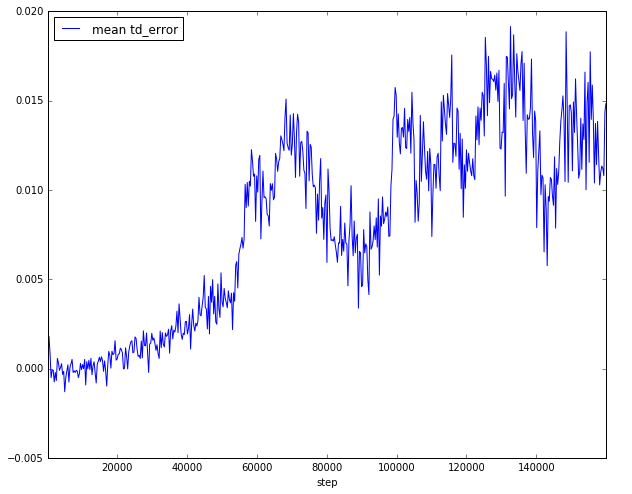

In [12]:
df.plot(x='step', y='mean td_error', figsize=(10, 8))

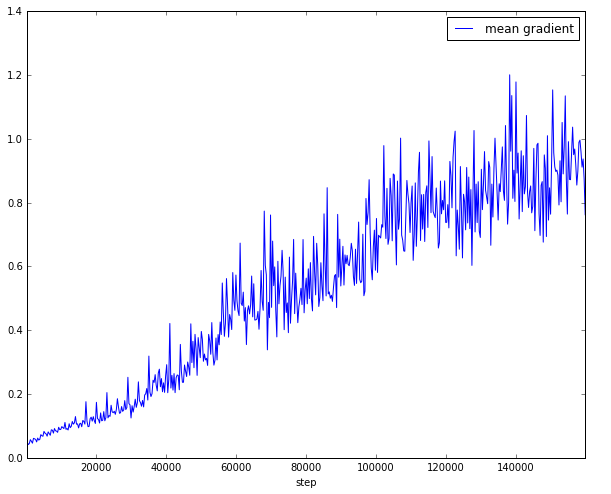

In [13]:
df.plot(x='step', y='mean gradient', figsize=(10, 8))

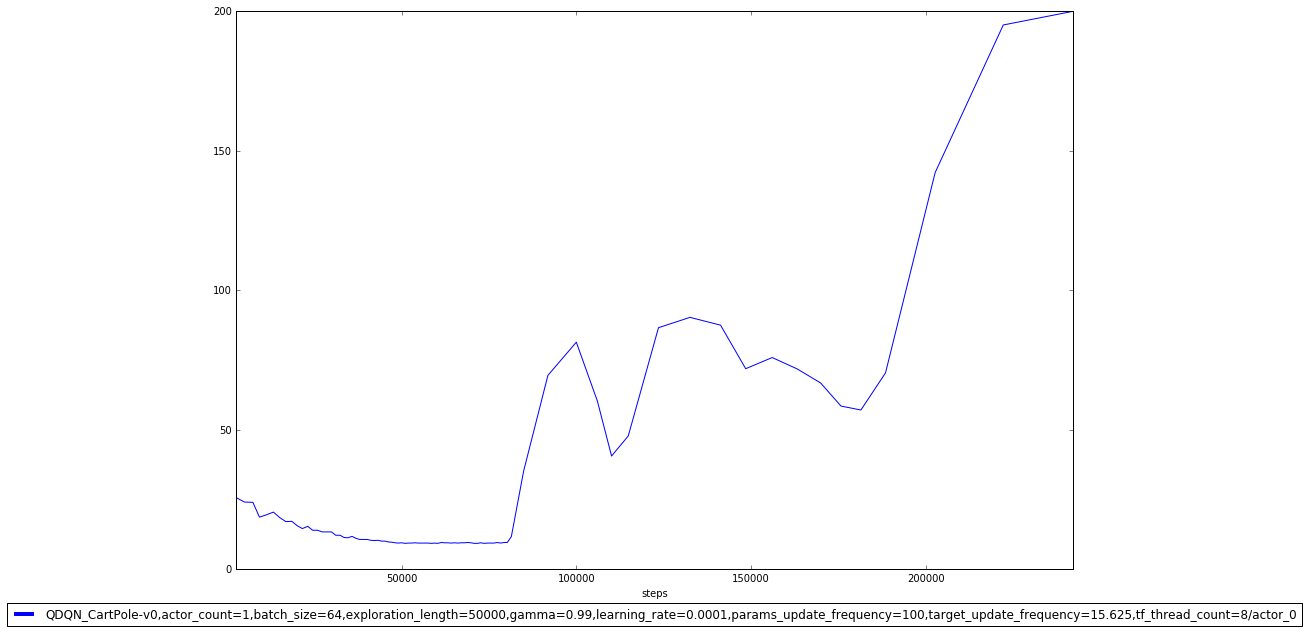

In [97]:
# name = 'QDQN_CartPole-v0,actor_count=1,batch_size=64,exploration_length=50000,gamma=0.99,learning_rate=0.0001,params_update_frequency=100,target_update_frequency=15.625,tf_thread_count=8/actor_0'
# analyze_experiments(base_path, [name], 'steps', 'mean episode reward')

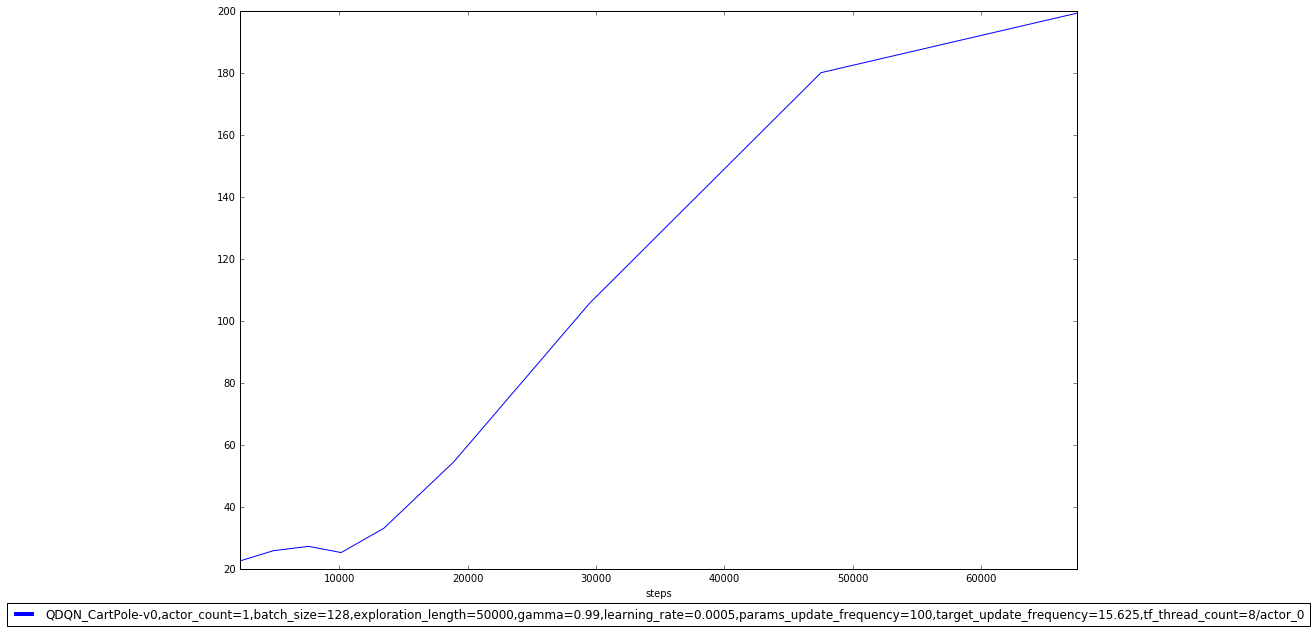

In [100]:
# name = 'QDQN_CartPole-v0,actor_count=1,batch_size=128,exploration_length=50000,gamma=0.99,learning_rate=0.0005,params_update_frequency=100,target_update_frequency=15.625,tf_thread_count=8/actor_0'
# analyze_experiments(base_path, [name], 'steps', 'mean episode reward')

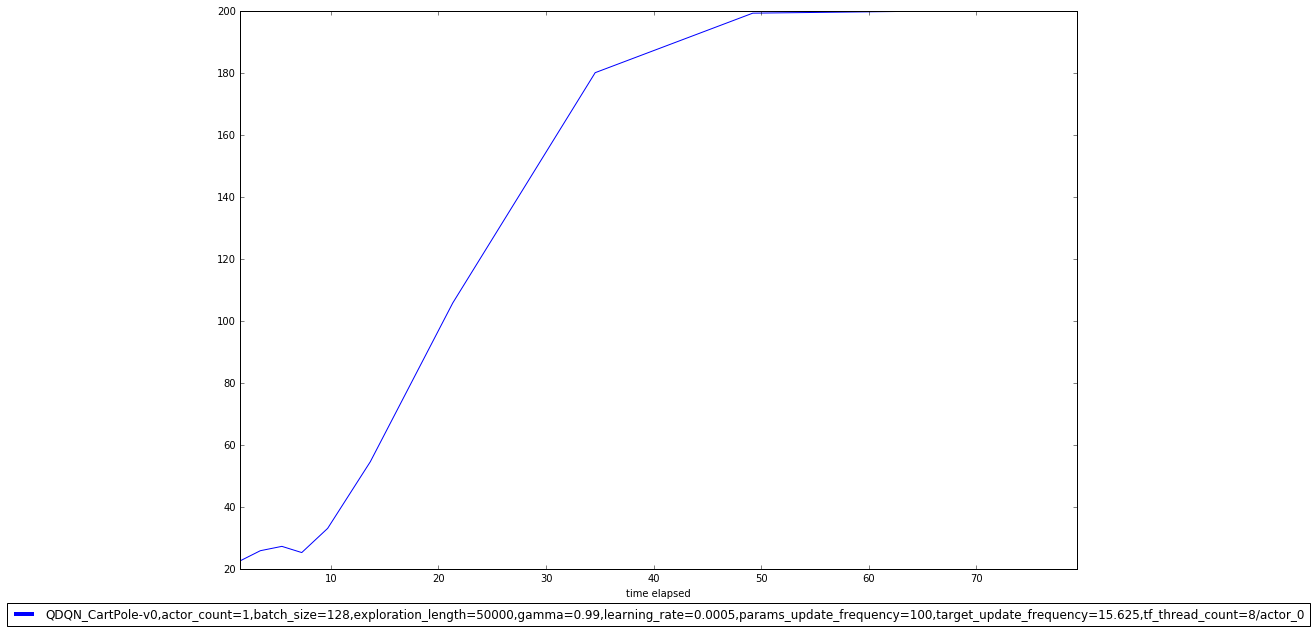

In [102]:
name = 'QDQN_CartPole-v0,actor_count=1,batch_size=128,exploration_length=50000,gamma=0.99,learning_rate=0.0005,params_update_frequency=100,target_update_frequency=15.625,tf_thread_count=8/actor_0'
analyze_experiments(base_path, [name], 'time elapsed', 'mean episode reward')

In [38]:
# df = pd.read_json(os.path.join(base_path, 'QDQN_CartPole-v0,actor_count=1,batch_size=32,exploration_length=50000,gamma=0.99,learning_rate=0.0001,params_update_frequency=32,target_update_frequency=7.8125,tf_thread_count=8,train_frequency=2/learner', 'progress.json'), lines=True)

In [37]:
# df

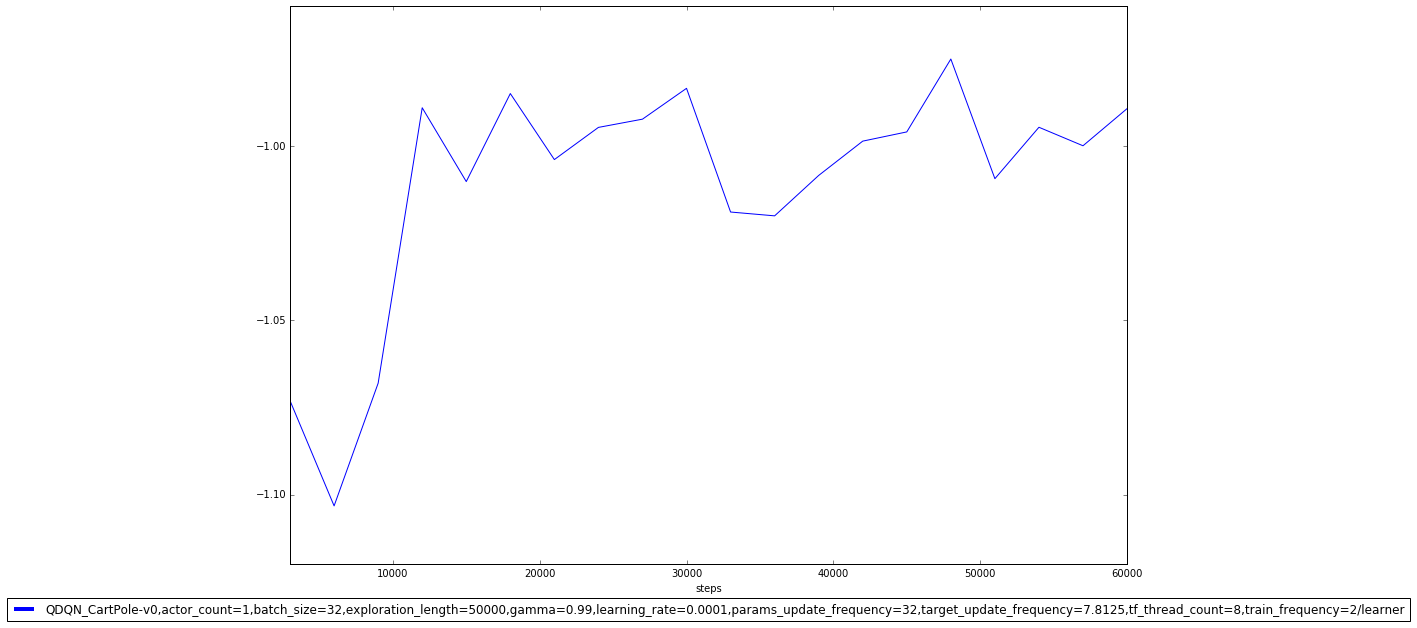

In [35]:
name = 'QDQN_CartPole-v0,actor_count=1,batch_size=32,exploration_length=50000,gamma=0.99,learning_rate=0.0001,params_update_frequency=32,target_update_frequency=7.8125,tf_thread_count=8,train_frequency=2/learner'
analyze_experiments(base_path, [name], 'steps', 'batch_mean_td_error')

In [60]:
# df = pd.read_json(os.path.join(base_path, 'ppaquette.DoomDefendCenter-v0/DQN,batch_size=128,gamma=0.99,learning_rate=0.0001,num_iterations=80000,replay_size=50000,target_update_frequency=500,tf_thread_count=8,train_frequency=4,worker_count=1/', 'progress.json'), lines=True)